## 0. Introduction

Since its debut in 2003, Steam, a sizable digital distribution service for video games, has drawn a lot of attention. It is currently the largest digital distribution platform for computer games worldwide. The Steam platform held approximately 75% of the market share in 2013. In 2019, Steam saw over 34,000 games on Steam's shelves and over 95 million monthly active users, while Steam is available in all major global gaming markets. As such, the data on the platform regarding video games is very representative. We believe it provides a more representative picture of the changing trends in video game themes and genres over the past 10 years. 

![juypter](https://upload.wikimedia.org/wikipedia/commons/c/c1/Steam_2016_logo_black.svg)

We take the "weekly charts" stats from Steam store `https://store.steampowered.com/charts` as the source of data.

The goal of the project is to collect, collate, analyse and visualise Steam game data to produce a report on global trends in Steam games, which will include the most popular categories of games by country and region, etc.


### This project is divided into three parts.

**Part 1:** set up and an introduction to other background projects.

**Part 2:** A tutorial on crawling and cleaning data. this part will introduce scraping methods for dynamic web information and introduce the functionality of the basic selenium library.

**Part 3:** Active learning practice. This part will contain 4 questions related to the previous content and you will need to complete the questions based on the content in the tutorial.

### Contributor Roles

https://credit.niso.org/contributor-roles-defined/

**Conceptualization:** `BAI, Haozhe`/`JIANG, Yingyue`/`LIU, Ruohan`/`WAN, Spring`/`ZHAO, Yuanjie`

**Data curation:** `BAI, Haozhe`/`JIANG, Yingyue`/`LIU, Ruohan`/`WAN, Spring`/`ZHAO, Yuanjie`

**Formal analysis:** `BAI, Haozhe`/`JIANG, Yingyue`/`LIU, Ruohan`/`ZHAO, Yuanjie`

**Software:** `BAI, Haozhe`/`ZHAO, Yuanjie`

**Validation:** `ZHAO, Yuanjie`

**Visualization:** `WAN, Spring`

**Writing – original draft:** `BAI, Haozhe`/`WAN, Spring`/`ZHAO, Yuanjie`

**Writing – review & editing:** `BAI, Haozhe`/`JIANG, Yingyue`/`LIU, Ruohan`/`WAN, Spring`/`ZHAO, Yuanjie`


## I. Preparation

`Selenium` is an open source python library for automated testing to validate web applications across different browsers and platforms.

For installing and documentation, please refer to `https://selenium-python.readthedocs.io/index.html`

In [10]:
pip install selenium==4.7.2

  Using cached selenium-4.7.2-py3-none-any.whl (6.3 MB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached exceptiongroup-1.1.0-py3-none-any.whl (14 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: selenium
    Found existing installation: selenium 3.3.1
    Uninstalling selenium-3.3.1:
      Successfully uninstalled selenium-3.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

## II. Webdriver Installation

follow the setup instruction

`https://sites.google.com/chromium.org/driver/getting-started`

#### Here, we take Google Chrome browser as an example.

First, go to top right corner of your browser, click the `three dots`; 

Then, select `Help` and then `About Google Chrome`;

Check your `browser version` and download the corresponding driver from `https://sites.google.com/chromium.org/driver/downloads`

(in terms of drivers for other browers, please see `https://selenium-python.readthedocs.io/installation.html#drivers)`

After downloading the driver, unzip it and move it to the folder you like

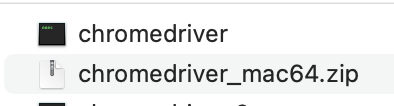

Then double click the `chromrdriver` file, wait until it shows 

`ChromeDriver was started successfully.`

Now, you can copy the file path of the driver as a parameter used following function.


#### Keyboard Shortcut for copying file path: 
   ##### - windows: 
   
   Press `Shift` + `Right Click` and simply click on `Copy as path`. OR 
   
   Press `ALT` + `D`, the path will appear, highlighted. `Right click` over the highlighted text and select copy.
    
   ##### - mac:
    
   Press `command` + `option` + `c`.

## III. Related Project

We have also found another project in regards to steam data scraping using `API`. 

If you are interested in API, you may also have a look at this project:

`https://nik-davis.github.io/posts/2019/steam-data-collection/`

## IV. API attempt

To begin with, we would like to use the method used in abovementioned projects in terms of gathering Steam game item data by using API provided by another website called `SteamSpy` `(https://steamspy.com/)`. 

However, SteamSpy can provide a lot of useful information, but the data does match our expectation. Therefore, we ultimately used another way, but we would still like to share our attempt to scrape data via API.

For detail information about SteamSpy API, please refer to `https://steamspy.com/api.php`.

In [117]:
url_test = 'https://steamspy.com/api.php'
parameters = {"request": "top100in2weeks"} # more parameters can be found on https://steamspy.com/api.php.
response = requests.get(url=url_test, params=parameters)
json_data = response.json()
df = pd.DataFrame.from_dict(json_data, orient='index')
app_list = df.reset_index(drop=True)

In [118]:
app_list.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,570,Dota 2,Valve,Valve,,1586776,330192,0,"200,000,000 .. 500,000,000",40447,1560,976,1084,0,0,0,581998
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,6082011,800798,0,"50,000,000 .. 100,000,000",29608,771,6381,271,0,0,0,1063175
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,1213688,917683,0,"50,000,000 .. 100,000,000",22856,648,6688,189,0,0,0,343480
3,1063730,New World,Amazon Games,Amazon Games,,174491,75525,0,"50,000,000 .. 100,000,000",8257,1454,3567,1311,3999,3999,0,35651
4,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,,483278,92741,0,"50,000,000 .. 100,000,000",6705,746,605,362,0,0,0,336459


## V. Steam data scraping

### Get urls

Since the Steam leaderboard section is a `dynamically updated web page`, we use the selenium library in python to simulate access to the web page and thus obtain the leaderboard section

We found that Steam's leaderboard requires a click on the `See all 100` button at the bottom in order to  load to show all the top 100 games. We therefore used `find_element_by_xpath()` to locate the button element and used `click()` to complete the automatic click.

Since the code performs the click before the page is loaded, the above approach does not work. We therefore chose to use Selenium's `explicit wait` to wait for the page to finish loading before performing the click

In [119]:
def get_links (url, chromedriver_path): # chromedriver_path is the location of your chromedriver file 
    s = Service(chromedriver_path)
    driver = webdriver.Chrome(service=s)   
    driver.get(url)
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//*[@id='application_root']/div/div/div/div/div[4]/div/button"))
    )
    element.click()
    
    time.sleep(10)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    data = soup.find_all('tr',{'class':'weeklytopsellers_TableRow_2-RN6'})

    top_100 = []
    for d in data:
        link = d.find('a', {'class':'weeklytopsellers_TopChartItem_2C5PJ'})
        top_100.append(link['href'])

    return top_100

### Get Game detail

 We plan to get `game title`, `genre`, `developer`, `publisher`, `release data`, `review scores`, `votes`, `user defined tags`, `platform supported` and if the game is `VR supported`.

In [120]:
def get_details (urls):
    detail_list = []
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
# get game title 
        try:
            game_title = soup.find('div', {'class':'details_block'}).b.next_sibling.strip()
        except:
            game_title = ''

# get game genre    
        try:
            list1 = soup.find('div', {'id':'genresAndManufacturer', 'class':'details_block'}).text.split('Genre: ')
            genre = list1[1].split('\n\n')[0]
        except:
            genre = ''

# get game developer    
        try:
            list2 = soup.find('div', {'id':'genresAndManufacturer', 'class':'details_block'}).text.split('Developer:\n')
            developer = dev = list2[1].split('\n\n\n')[0]
        except:
            developer = ''

# get publisher
        try:
            publisher = soup.find('div', {'id':'genresAndManufacturer', 'class':'details_block'}).text.split('\n')[9]
        except:
            publisher = ''
            
# get release date
        try:
            release_date = soup.find('div', {'id':'genresAndManufacturer', 'class':'details_block'}).text.split('Release Date:')[1].replace('\n', '').strip()
        except:
            release_date = ''
    
    
# get all reviews
        try:
            all_reviews = soup.find('span', {'itemprop':'description'}).text
        except:
            all_reviews = ''
    
# get all votes
        try:
            all_votes = soup.find('span', {'class':'responsive_hidden'}).text.replace('\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t(', '').replace(')\r\n\t\t\t\t\t\t\t\t\t\t\t\t', '')
        except:
            all_votes = ''
            
            
# get user defined tags    
        try:
            info2 = soup.find('div', {'data-panel':'{"flow-children":"row"}', 'class':'glance_tags popular_tags'})
            tag_list = info2.find_all('a')
            tags = []
            for t in tag_list:
                text = t.text.replace('\r\n\t\t\t\t\t\t\t\t\t\t\t\t', '')
                tags.append(text.replace('\t\t\t\t\t\t\t\t\t\t\t\t', ''))
                tags = tags[0:5]
            user_defined_tags = ', '.join(tags)
        except:
            user_defined_tags = ''
    
# platform and vr supported
        try:
            win_list = soup.find_all('span', {'class':'platform_img win'})
            win = ''
            if win_list:
                win = 'Yes'
            else:
                win = 'No'

            mac_list = soup.find_all('span', {'class':'platform_img mac'})
            mac = ''
            if mac_list:
                mac = 'Yes'
            else:
                mac = 'No'

            linux_list = soup.find_all('span', {'class':'platform_img linux'})
            linux = ''
            if linux_list:
                linux = 'Yes'
            else:
                linux = 'No'

            vr_list = soup.find_all('span', {'class':'vr_supported'})
            vr = ''
            if vr_list:
                vr = 'Yes'
            else:
                vr = 'No'
        except:
            win = ''
            mac = ''
            linux = ''
            vr = ''
        
# get list
        detail = [game_title, genre, developer, publisher, release_date, all_reviews, all_votes, user_defined_tags, win, mac, linux, vr]
        detail_list.append(detail)

    return detail_list

### Get csv file

In [4]:
def get_steam_csv (urls, filename):
    df = pd.DataFrame(get_details (urls))
    df.columns = ['Game_Title', 'Genre', 'Developer','Publisher', 'Release_Date', 'All_Reviews', 
              'All_Votes', 'User_Defined_Tags', 'Win', 'Mac', 'Linux', 'VR_Supported']
    return df.to_csv(filename, encoding='utf-8')

### Data Cleaning

After observing the exported files, we have found that due to website structure and some other reasons, there are some empty rows in the file. Meanwhile, some release dates are attached with `Early Access`. All these will cause troubles during data describing the process. Therefore, a data-cleaning process is necessary. 

In [122]:
def data_clean(csv_path):
    df = pd.read_csv(csv_path, encoding = 'utf-8').dropna().drop(columns=['Unnamed: 0'])
    df['Release_Date'] = df['Release_Date'].replace('Early Access', '', regex=True)
    return df

### Get labels

In columns such as `Genre` and `Use_Defined_Tages` there are two or more labels, therefore in this step we need to split these cells to generate a new Dataframe to assist in the subsequent part of the description of the data.

In later practice we find that there could be spaces before and after some data, which could affect subsequent analysis and calculations, so we remove the spaces here in the output of the labels.

In [3]:
def get_labels(df, column):
    labels = df[column].str.split(',', expand=True)
    return labels.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## VI. Visualisation

Here we take Global, China, Japan and the Netherlands as an example.

In [18]:
folder_path = 'data/'
csv_files = [file for file in os.listdir('data/') if file.endswith('.csv')]

# You may change the files to the ones you would like to compare. 
csv_files = [file for file in csv_files if file in ["Steam_Games_Top100_CN_w_c_20Dec.csv", 
                                                   "Steam_Games_Top100_GL_w_c_20Dec.csv", 
                                                   "Steam_Games_Top100_JP_w_c_20Dec.csv", 
                                                   "Steam_Games_Top100_NL_w_c_20Dec.csv"]]

dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

df=pd.concat(dataframes)
df=df[["Game_Title","Genre"]]
d1={}
all_types=[]
for index, row in df.iterrows():
    if(row["Genre"]==row["Genre"]):
        name=row["Game_Title"]
        x=row["Genre"]
        x2=x.split(",")
        x3=[data.strip(" ") for data in x2]
        d1[name]=x3
        all_types.extend(x3)
all_types=[type for type in set(all_types)]


ds=[]
d_last={}
for df in dataframes:
    d={}
    for str in df["Genre"]:
        for type in all_types:
            if(str==str):
                if(type in str):
                    if(type in d.keys()):
                        d[type]+=1
                    else:
                        d[type]=1
    ds.append(d)
l=[]
for type in all_types:
    l2=[]

    for d in ds:
        if(type in d.keys()):
            l2.append(d[type])
        else:
            l2.append(0)
    l.append(l2)


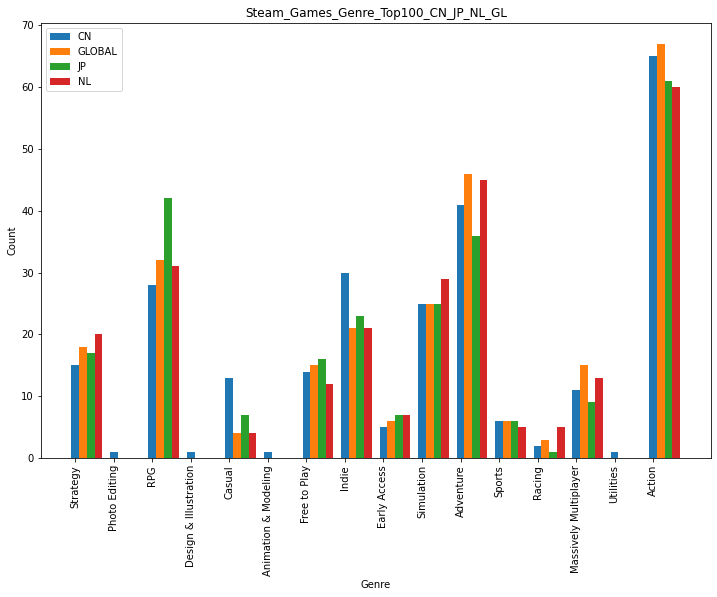

In [19]:
x = np.arange(len(all_types))
l2=[[],[],[],[]]
for data in l:
    for i in range(0,4):
        l2[i].append(data[i])
ys=l2
bar_width = 0.2
tick_label=all_types
labels=["CN","GLOBAL","JP","NL"]
plt.figure(figsize=(12,8))
for i,y in enumerate(ys):
    plt.bar(x+i*bar_width, y, bar_width,label=labels[i])
    
tick_label=all_types
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Steam_Games_Genre_Top100_CN_JP_NL_GL')
plt.xticks(x, tick_label)
plt.xticks(rotation=90)
plt.legend()
plt.show()

## VII. Active Learning

### Given by the the tables of ranking of Top 100 games on steam platform , you are expected to find a way to analyze our charts and discover some visible trends.

Note that you might apply the `function` you have previously learned. 

A Grand Data Projects is not necessarily, still you can make more elaborate charts by checking out more information for helpful optional parameters via these websites below.

`https://steamdb.info/`

`https://steamdb.info/faq/#how-are-we-getting-this-information`

#### 1.Try to identify the most popular game genres and tags in the South Korea of last week (depending on your current date) and analyse what you think are the main reasons for this trend based on the data of the Netherlands region on steam.

In [35]:
url = 'https://store.steampowered.com/charts/topsellers/KR/2022-12-20' # You may select any leaderboard you like.
chromedriver_path = 'chromedriver' # The path of chromedriver on your own computer.

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_KR_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [36]:
pd.options.display.max_rows = 400
KR_df=pd.read_csv('data/Steam_Games_Top100_KR_w_c_20Dec.csv', index_col=0, delimiter=',', encoding='utf-8')

KR_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,Project Zomboid,"Indie, RPG, Simulation, Early Access",The Indie Stone,The Indie Stone,"8 Nov, 2013",Very Positive,"10,256","Survival, Zombies, Open World, Open World Surv...",Yes,Yes,Yes,No
1,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,838","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
2,PUBG: BATTLEGROUNDS,"Action, Adventure, Free to Play, Massively Mul...","KRAFTON, Inc.","KRAFTON, Inc.","21 Dec, 2017",Mixed,"15,687","Survival, Shooter, Battle Royale, Multiplayer,...",Yes,No,No,No
3,EA SPORTS™ FIFA 23,"Simulation, Sports",EA Canada & EA Romania,Electronic Arts,"29 Sep, 2022",Mixed,"17,714","Football (Soccer), Sports, eSports, Controller...",Yes,No,No,No
4,DJMAX RESPECT V,"Action, Casual, Sports",NEOWIZ,NEOWIZ,"11 Mar, 2020Early Access",Very Positive,389,"Rhythm, Casual, Music, Action, Sports",Yes,No,No,No


In [11]:
KR_df = data_clean('Steam_Games_Top100_KR_w_c_20Dec.csv')

KR_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,Project Zomboid,"Indie, RPG, Simulation, Early Access",The Indie Stone,The Indie Stone,"8 Nov, 2013",Very Positive,"10,091","Survival, Zombies, Open World, Open World Surv...",Yes,Yes,Yes,No
1,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,498","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
2,PUBG: BATTLEGROUNDS,"Action, Adventure, Free to Play, Massively Mul...","KRAFTON, Inc.","KRAFTON, Inc.","21 Dec, 2017",Mixed,"15,650","Survival, Shooter, Battle Royale, Multiplayer,...",Yes,No,No,No
3,EA SPORTS™ FIFA 23,"Simulation, Sports",EA Canada & EA Romania,Electronic Arts,"29 Sep, 2022",Mixed,"17,735","Football (Soccer), Sports, eSports, Controller...",Yes,No,No,No
4,DJMAX RESPECT V,"Action, Casual, Sports",NEOWIZ,NEOWIZ,"11 Mar, 2020",Very Positive,381,"Rhythm, Casual, Action, Music, Sports",Yes,No,No,No


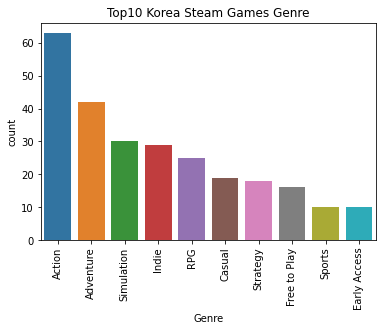

In [135]:
labels_KR_G = get_labels(KR_df, 'Genre')

total = []
for i in range (6):
    genre = list(labels_KR_G[i].values)
    total.extend(genre)

labels_KR_G = pd.DataFrame()
labels_KR_G[0] = total

sns.countplot(data=labels_KR_G, x=0,order=labels_KR_G[0].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top10 Korea Steam Games Genre')
plt.xlabel('Genre')
plt.show()

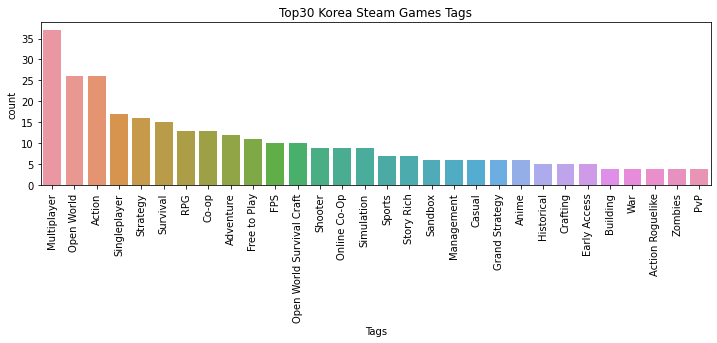

In [134]:
labels_KR_T = get_labels(KR_df, 'User_Defined_Tags')

total = []
for i in range (5):
    tag = list(labels_KR_T[i].values)
    total.extend(tag)

labels_KR_T = pd.DataFrame()
labels_KR_T[0] = total

plt.figure(figsize=(12,3))
sns.countplot(data=labels_KR_T, x=0,order=labels_KR_T[0].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.title('Top30 Korea Steam Games Tags')
plt.xlabel('Tags')
plt.show()

The most genre in Korea is still action, other than that, there are more appearances of adventure, simulation and indie.The most famous Korean game is PUBG, a game developed by a Korean company, which has the tags of FPS and survival, and this game may have a great influence on the data. This game may have influenced the data to a great extent. Secondly, open world games have become very popular in recent years, and many famous titles have created their own worlds, and this trend has a great influence on Korean people's game choices.

#### 2. How much does the popularity of a game correlate with its release date, and do newer games tend to be more popular?

We must first define `popularity` before we can calculate the game's level of popularity. Since this is already a list of the top 100, we can judge using `All Votes`, in which case we consider the game with more votes to be more well-liked.

Next, we need to confirm the type of all data in this Dataframe. Here you can use `df.info()` to check.
        
Here we take Steam data from the `Netherlands` as an example.

In [34]:
url = 'https://store.steampowered.com/charts/topsellers/NL/2022-12-20'
chromedriver_path = 'chromedriver'

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_NL_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [21]:
csv_path = 'data/Steam_Games_Top100_NL_w_c_20Dec.csv'
NL_df = data_clean(csv_path)

NL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Game_Title         95 non-null     object
 1   Genre              95 non-null     object
 2   Developer          95 non-null     object
 3   Publisher          95 non-null     object
 4   Release_Date       95 non-null     object
 5   All_Reviews        95 non-null     object
 6   All_Votes          95 non-null     object
 7   User_Defined_Tags  95 non-null     object
 8   Win                95 non-null     object
 9   Mac                95 non-null     object
 10  Linux              95 non-null     object
 11  VR_Supported       95 non-null     object
dtypes: object(12)
memory usage: 9.6+ KB


From the above information, we can see that the data type of all data content is `obeject`, and for correlation analysis, we need `Release_Date` and `All_Votes` to be `int`.

In order to convert `All_Votes` column into integer, we can first define a function converting one string into integer. And then, use `.apply()` in pandas to convert the whole column.

In [22]:
# Change date from string into integer.

NL_df['Release_Date'] = pd.to_datetime(NL_df['Release_Date'])
NL_df['Release_Date'] = NL_df['Release_Date'].dt.strftime('%Y%m%d')
NL_df['Release_Date'] = NL_df['Release_Date'].astype(int)


# Convert "All_Votes"column into integer

def convert_to_int(string_num):
    return int(string_num.replace(',',''))

NL_df['All_Votes'] = NL_df['All_Votes'].apply(convert_to_int)

In [23]:
NL_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
1,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,20221027,Mixed,21055,"FPS, Action, Shooter, Multiplayer, Singleplayer",Yes,No,No,No
2,EA SPORTS™ FIFA 23,"Simulation, Sports",EA Canada & EA Romania,Electronic Arts,20220929,Mixed,17735,"Football (Soccer), Sports, eSports, Controller...",Yes,No,No,No
3,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",20220224,Very Positive,21498,"Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
4,War Thunder,"Action, Free to Play, Massively Multiplayer, S...",Gaijin Entertainment,Gaijin Distribution KFT,20130815,Mostly Positive,9805,"Free to Play, Vehicular Combat, Combat, VR, Wo...",Yes,Yes,Yes,Yes
5,High On Life,"Action, Adventure","Squanch Games, Inc.","Squanch Games, Inc.",20221213,Very Positive,4480,"FPS, Comedy, Singleplayer, Adventure, Action-A...",Yes,No,No,No


We can use the correlation calculation function in pandas for statistics. Here, since we care more about the ranking relationship between two variables than the numerical relationship, we can choose to use the `Spearman rank correlation coefficient` for statistics.

In [24]:
x = pd.Series(NL_df.Release_Date)
y = pd.Series(NL_df.All_Votes)

 
corr = x.corr(y, method='spearman')
print (corr)

-0.22123070032317219


At the same time, we can also use the plot method to see whether the two sets of data are correlated.

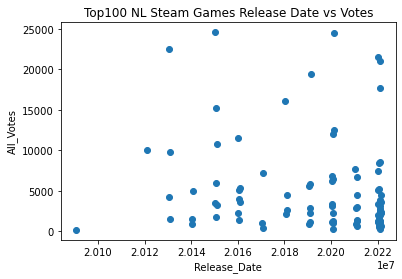

In [25]:
plt.scatter(x,y)
plt.xlabel("Release_Date")
plt.ylabel("All_Votes")
plt.title('Top100 NL Steam Games Release Date vs Votes')
plt.show()

Through the above analysis, we can know that in the Top 100 list of Steam games in the Netherlands, the popularity of a game has a certain level of negative correlation with its release date, but the correlation between the two variables is relatively weak.

#### 3. How similar is the US ranking chart for the popularity of games on the Steam platform to the global ranking chart?

In [17]:
url = 'https://store.steampowered.com/charts/topsellers/US/2022-12-20'
chromedriver_path = 'chromedriver'

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_US_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [44]:
url = 'https://store.steampowered.com/charts/topsellers/global/2022-12-20'
chromedriver_path = 'chromedriver'

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_GL_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [124]:
pd.options.display.max_rows= 999
US_df = pd.read_csv('data/Steam_Games_Top100_US_w_c_20Dec.csv', index_col=0, delimiter=',')
US_df = data_clean('data/Steam_Games_Top100_US_w_c_20Dec.csv')

US_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
1,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"20,346","FPS, Action, Multiplayer, Shooter, Singleplayer",Yes,No,No,No
2,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,838","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
3,Counter-Strike: Global Offensive,"Action, Free to Play","Valve, Hidden Path Entertainment",Valve,"21 Aug, 2012",Very Positive,"81,907","FPS, Shooter, Multiplayer, Competitive, Action",Yes,Yes,Yes,No
4,High On Life,"Action, Adventure","Squanch Games, Inc.","Squanch Games, Inc.","13 Dec, 2022",Very Positive,"4,128","FPS, Comedy, Singleplayer, Adventure, Action-A...",Yes,No,No,No
5,War Thunder,"Action, Free to Play, Massively Multiplayer, S...",Gaijin Entertainment,Gaijin Distribution KFT,"15 Aug, 2013",Mostly Positive,"9,678","Free to Play, Vehicular Combat, Combat, VR, Wo...",Yes,Yes,Yes,Yes


In [125]:
GL_df = pd.read_csv('data/Steam_Games_Top100_GL_w_c_20Dec.csv', index_col=0, delimiter=',')
GL_df = data_clean('data/Steam_Games_Top100_GL_w_c_20Dec.csv')

GL_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,Counter-Strike: Global Offensive,"Action, Free to Play","Valve, Hidden Path Entertainment",Valve,"21 Aug, 2012",Very Positive,"80,720","FPS, Shooter, Multiplayer, Competitive, Action",Yes,Yes,Yes,No
1,Dota 2,"Action, Free to Play, Strategy",Valve,Valve,"9 Jul, 2013",Very Positive,"22,501","Free to Play, MOBA, Multiplayer, Strategy, eSp...",Yes,Yes,Yes,No
2,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"21,077","FPS, Action, Shooter, Multiplayer, Singleplayer",Yes,No,No,No
4,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,519","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
5,EA SPORTS™ FIFA 23,"Simulation, Sports",EA Canada & EA Romania,Electronic Arts,"29 Sep, 2022",Mixed,"17,754","Football (Soccer), Sports, eSports, Controller...",Yes,No,No,No


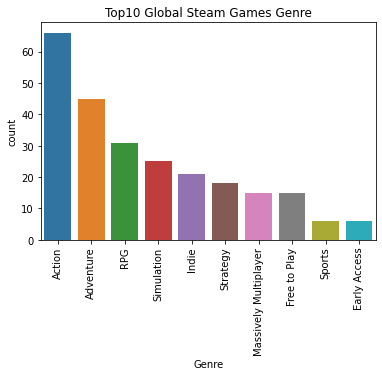

In [136]:
labels_GL_G = get_labels(GL_df, 'Genre')

total = []
for i in range (6):
    genre = list(labels_GL_G[i].values)
    total.extend(genre)

labels_GL_G = pd.DataFrame()
labels_GL_G[0] = total

sns.countplot(data=labels_GL_G, x=0,order=labels_GL_G[0].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top10 Global Steam Games Genre')
plt.xlabel('Genre')
plt.show()


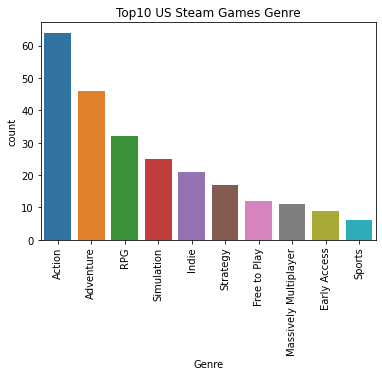

In [137]:
labels_US_G = get_labels(US_df, 'Genre')

total = []
for i in range (6):
    genre = list(labels_US_G[i].values)
    total.extend(genre)

labels_US_G = pd.DataFrame()
labels_US_G[0] = total

sns.countplot(data=labels_US_G, x=0,order=labels_US_G[0].value_counts().iloc[:10].index)
plt.title('Top10 US Steam Games Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

What US games and World games have in common is that in the top 100 most popular games, the most popular genres are similar, for example, action is the most popular game. And the structure of the popular games are similar.

#### 4. What are the differences in the popular game genres on steam platform between China and Japan, which are also Asian countries?

In [14]:
url = 'https://store.steampowered.com/charts/topsellers/JP/2022-12-20'
chromedriver_path = 'chromedriver'

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_JP_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [18]:
url = 'https://store.steampowered.com/charts/topsellers/CN/2022-12-20'
chromedriver_path = 'chromedriver'

urls = get_links (url, chromedriver_path)
filename = 'Steam_Games_Top100_CN_w_c_20Dec.csv'
get_steam_csv (urls, filename)

In [7]:
pd.options.display.max_rows = 400
JP_df=pd.read_csv('data/Steam_Games_Top100_JP_w_c_20Dec.csv', index_col=0, delimiter=',', encoding='utf-8')

JP_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,838","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
1,Apex Legends™,"Action, Adventure, Free to Play",Respawn Entertainment,Electronic Arts,"4 Nov, 2020",Very Positive,"24,552","Free to Play, Multiplayer, Battle Royale, Shoo...",Yes,No,No,No
2,Tower of Fantasy,"Action, Free to Play, Massively Multiplayer, RPG",Hotta Studio,Level Infinite,"19 Oct, 2022",Mostly Positive,623,"RPG, MMORPG, Action, Action-Adventure, Anime",Yes,No,No,No
3,Yu-Gi-Oh! Master Duel,"Free to Play, Simulation, Strategy",Konami Digital Entertainment,Konami Digital Entertainment,"18 Jan, 2022",Mostly Positive,"1,434","Card Game, Free to Play, Strategy, Trading Car...",Yes,No,No,No
4,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"20,346","FPS, Action, Multiplayer, Shooter, Singleplayer",Yes,No,No,No


In [8]:
JP_df = data_clean('data/Steam_Games_Top100_JP_w_c_20Dec.csv')

JP_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,838","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
1,Apex Legends™,"Action, Adventure, Free to Play",Respawn Entertainment,Electronic Arts,"4 Nov, 2020",Very Positive,"24,552","Free to Play, Multiplayer, Battle Royale, Shoo...",Yes,No,No,No
2,Tower of Fantasy,"Action, Free to Play, Massively Multiplayer, RPG",Hotta Studio,Level Infinite,"19 Oct, 2022",Mostly Positive,623,"RPG, MMORPG, Action, Action-Adventure, Anime",Yes,No,No,No
3,Yu-Gi-Oh! Master Duel,"Free to Play, Simulation, Strategy",Konami Digital Entertainment,Konami Digital Entertainment,"18 Jan, 2022",Mostly Positive,"1,434","Card Game, Free to Play, Strategy, Trading Car...",Yes,No,No,No
4,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"20,346","FPS, Action, Multiplayer, Shooter, Singleplayer",Yes,No,No,No


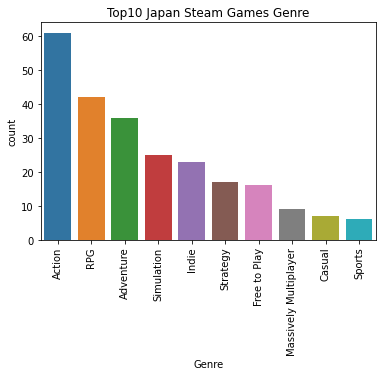

In [138]:
labels_JP_G = get_labels(JP_df, 'Genre')

total = []
for i in range (6):
    genre = list(labels_JP_G[i].values)
    total.extend(genre)

labels_JP_G = pd.DataFrame()
labels_JP_G[0] = total

sns.countplot(data=labels_JP_G, x=0,order=labels_JP_G[0].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top10 Japan Steam Games Genre')
plt.xlabel('Genre')
plt.show()

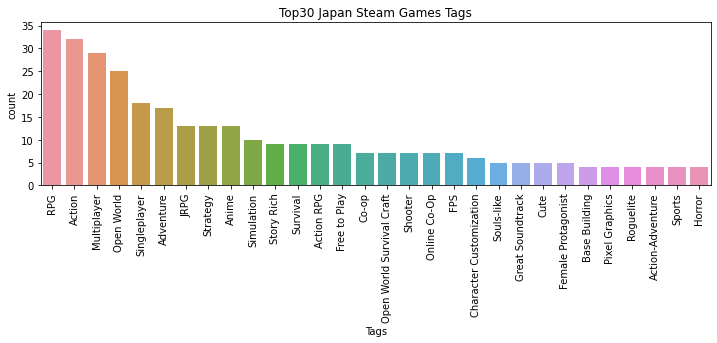

In [140]:
labels_JP_T = get_labels(JP_df, 'User_Defined_Tags')

total = []
for i in range (5):
    tag = list(labels_JP_T[i].values)
    total.extend(tag)

labels_JP_T = pd.DataFrame()
labels_JP_T[0] = total

plt.figure(figsize=(12,3))
sns.countplot(data=labels_JP_T, x=0,order=labels_JP_T[0].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.title('Top30 Japan Steam Games Tags')
plt.xlabel('Tags')
plt.show()

In [19]:
pd.options.display.max_rows = 400
CN_df=pd.read_csv('data/Steam_Games_Top100_CN_w_c_20Dec.csv', index_col=0, delimiter=',', encoding='utf-8')

CN_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"19,634","FPS, Action, Multiplayer, Shooter, Singleplayer",Yes,No,No,No
1,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,655","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
2,Apex Legends™,"Action, Adventure, Free to Play",Respawn Entertainment,Electronic Arts,"4 Nov, 2020",Very Positive,"24,330","Free to Play, Multiplayer, Battle Royale, Shoo...",Yes,No,No,No
3,PUBG: BATTLEGROUNDS,"Action, Adventure, Free to Play, Massively Mul...","KRAFTON, Inc.","KRAFTON, Inc.","21 Dec, 2017",Mixed,"15,566","Survival, Shooter, Battle Royale, Multiplayer,...",Yes,No,No,No
4,Counter-Strike: Global Offensive,"Action, Free to Play","Valve, Hidden Path Entertainment",Valve,"21 Aug, 2012",Very Positive,"81,119","FPS, Shooter, Multiplayer, Competitive, Action",Yes,Yes,Yes,No


In [31]:
CN_df = data_clean('data/Steam_Games_Top100_CN_w_c_20Dec.csv')

CN_df.head()

,Game_Title,Genre,Developer,Publisher,Release_Date,All_Reviews,All_Votes,User_Defined_Tags,Win,Mac,Linux,VR_Supported
0,Call of Duty®: Modern Warfare® II,Action,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"27 Oct, 2022",Mixed,"19,634","FPS, Action, Multiplayer, Shooter, Singleplayer",Yes,No,No,No
1,ELDEN RING,"Action, RPG",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment","24 Feb, 2022",Very Positive,"21,655","Souls-like, Dark Fantasy, RPG, Open World, Dif...",Yes,No,No,No
2,Apex Legends™,"Action, Adventure, Free to Play",Respawn Entertainment,Electronic Arts,"4 Nov, 2020",Very Positive,"24,330","Free to Play, Multiplayer, Battle Royale, Shoo...",Yes,No,No,No
3,PUBG: BATTLEGROUNDS,"Action, Adventure, Free to Play, Massively Mul...","KRAFTON, Inc.","KRAFTON, Inc.","21 Dec, 2017",Mixed,"15,566","Survival, Shooter, Battle Royale, Multiplayer,...",Yes,No,No,No
4,Counter-Strike: Global Offensive,"Action, Free to Play","Valve, Hidden Path Entertainment",Valve,"21 Aug, 2012",Very Positive,"81,119","FPS, Shooter, Multiplayer, Competitive, Action",Yes,Yes,Yes,No


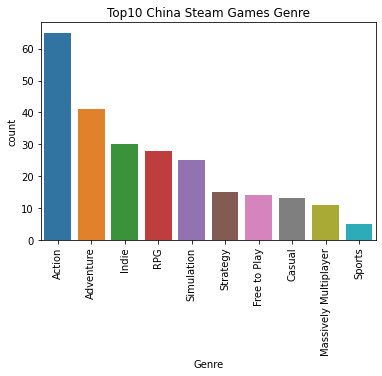

In [139]:
labels_CN_G = get_labels(CN_df, 'Genre')

total = []
for i in range (6):
    genre = list(labels_CN_G[i].values)
    total.extend(genre)

labels_CN_G = pd.DataFrame()
labels_CN_G[0] = total

sns.countplot(data=labels_CN_G, x=0,order=labels_CN_G[0].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Top10 China Steam Games Genre')
plt.xlabel('Genre')
plt.show()

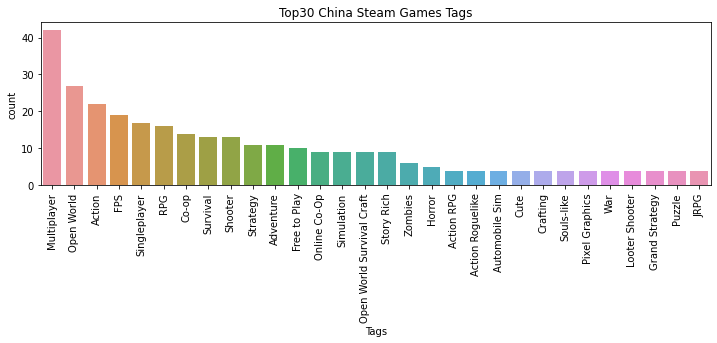

In [141]:
labels_CN_T = get_labels(CN_df, 'User_Defined_Tags')

total = []
for i in range (5):
    tag = list(labels_CN_T[i].values)
    total.extend(tag)

labels_CN_T = pd.DataFrame()
labels_CN_T[0] = total

plt.figure(figsize=(12,3))
sns.countplot(data=labels_CN_T, x=0,order=labels_CN_T[0].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.title('Top30 China Steam Games Tags')
plt.xlabel('Tags')
plt.show()

 In the Top100 list of Steam games, the difference between China and Japan is relatively significant. From the Top100 games genre, the most popular games in Japan are Action, Role-Playing Game, Adventure and Free to play, while the most popular games in China are Action, Adventure, Simulation, Indie.

From the Top100 games tag of both countries, the most popular ones that distinguish China from Japan are First Person Shooter games and cooperative games, while Japanese gamers are more inclined to role-playing and survival skill-based games.